### Batch size 16 --> 32

## gdrive 연결

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


## Import library

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
import tensorflow as tf
import PIL.Image as pilimg
import os
import pandas as pd
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Input
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dropout, Conv2D, MaxPooling2D, Conv2DTranspose, BatchNormalization

import random
import pickle
import cv2
import matplotlib

from glob import glob
from numpy import random
from PIL import Image
# gpu
print(len(tf.config.experimental.list_physical_devices('GPU')))

1


## copy files and unzip

In [2]:
!cp '/gdrive/MyDrive/CV4_Data/zoomin.zip' ./
#!cp '/gdrive/MyDrive/CV4_Data/zoomout.zip' ./
!cp '/gdrive/MyDrive/CV4_Data/test_destroyed.zip' ./
!cp '/gdrive/MyDrive/CV4_Data/test_sw_block.zip' ./
#!cp '/gdrive/MyDrive/CV4_Data/test_zoomout.zip' ./

In [2]:
!ls -al

total 312776
drwxr-xr-x 1 root root      4096 Aug 11 08:31 .
drwxr-xr-x 1 root root      4096 Aug 11 08:20 ..
drwxr-xr-x 4 root root      4096 Aug  3 20:20 .config
drwxr-xr-x 5 root root      4096 Aug 11 08:31 __MACOSX
drwxr-xr-x 2 root root    307200 Aug  8 11:22 new_dataset
-rw------- 1 root root 136373671 Aug 11 08:31 new_dataset.zip
drwxr-xr-x 3 root root      4096 Aug 11 11:41 r_destroyed
drwxr-xr-x 1 root root      4096 Aug  3 20:21 sample_data
-rw------- 1 root root  22049986 Aug 11 11:33 test_destroyed.zip
drwxr-xr-x 2 root root      4096 Aug  8 11:33 test_sw_block
-rw------- 1 root root    391142 Aug 11 11:33 test_sw_block.zip
-rw------- 1 root root 161112367 Aug 11 11:33 zoomin.zip


In [5]:
!cp '/gdrive/MyDrive/CV4_Data/new_dataset.zip' ./
!unzip new_dataset.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: new_dataset/zoom_in6786.jpg  
  inflating: __MACOSX/new_dataset/._zoom_in6786.jpg  
  inflating: new_dataset/zoom_in8973.jpg  
  inflating: __MACOSX/new_dataset/._zoom_in8973.jpg  
  inflating: new_dataset/zoom_in6976.jpg  
  inflating: __MACOSX/new_dataset/._zoom_in6976.jpg  
  inflating: new_dataset/zoom_in8783.jpg  
  inflating: __MACOSX/new_dataset/._zoom_in8783.jpg  
  inflating: new_dataset/zoom_in4807.jpg  
  inflating: __MACOSX/new_dataset/._zoom_in4807.jpg  
  inflating: new_dataset/zoom_in4813.jpg  
  inflating: __MACOSX/new_dataset/._zoom_in4813.jpg  
  inflating: new_dataset/zoom_in6962.jpg  
  inflating: __MACOSX/new_dataset/._zoom_in6962.jpg  
  inflating: new_dataset/zoom_in8797.jpg  
  inflating: __MACOSX/new_dataset/._zoom_in8797.jpg  
  inflating: new_dataset/zoom_in9489.jpg  
  inflating: __MACOSX/new_dataset/._zoom_in9489.jpg  
  inflating: new_dataset/zoom_in4146.jpg  
  inflating: __MACOSX/new_dataset/._zoom_in4146.

In [6]:
!unzip test_destroyed.zip
!unzip test_sw_block.zip

Archive:  test_destroyed.zip
   creating: r_destroyed/
  inflating: __MACOSX/._r_destroyed  
  inflating: r_destroyed/d_33.jpeg   
  inflating: __MACOSX/r_destroyed/._d_33.jpeg  
  inflating: r_destroyed/d_32.jpeg   
  inflating: __MACOSX/r_destroyed/._d_32.jpeg  
  inflating: r_destroyed/d_18.jpg    
  inflating: __MACOSX/r_destroyed/._d_18.jpg  
  inflating: r_destroyed/d_24.jpg    
  inflating: __MACOSX/r_destroyed/._d_24.jpg  
  inflating: r_destroyed/d_35.jpeg   
  inflating: __MACOSX/r_destroyed/._d_35.jpeg  
  inflating: r_destroyed/d_25.jpg    
  inflating: __MACOSX/r_destroyed/._d_25.jpg  
  inflating: r_destroyed/d_19.jpg    
  inflating: __MACOSX/r_destroyed/._d_19.jpg  
  inflating: r_destroyed/d_27.jpg    
  inflating: __MACOSX/r_destroyed/._d_27.jpg  
  inflating: r_destroyed/d_26.jpg    
  inflating: __MACOSX/r_destroyed/._d_26.jpg  
  inflating: r_destroyed/d_22.jpg    
  inflating: __MACOSX/r_destroyed/._d_22.jpg  
  inflating: r_destroyed/d_38.jpeg   
  inflating: __M

## Data 가공

In [2]:
zoomin_count = len(os.listdir('new_dataset'))
zoomin_count

9774

In [3]:
# zoomin
zoomin_tmp = glob('new_dataset/*.jpg') + glob('new_dataset/*.jpeg')
print(len(zoomin_tmp))

zoomin_list = []
for img in zoomin_tmp:
    img = load_img(img)
    img = img_to_array(img).astype('float32')/255
    a = 48
    h = 128
    crop_img = img[a: a + h, a: a + h]

    zoomin_list.append(crop_img)

zoomin_data = np.array(zoomin_list)
zoomin_data.shape

9774


(9774, 128, 128, 3)

In [4]:
zoomin_train, zoomin_test = train_test_split(zoomin_data, test_size=0.1, shuffle=True, random_state=42)

In [5]:
# test set
test_destroyed = glob('r_destroyed/*.jpeg') + glob('r_destroyed/*.jpg')
test_sw_block = glob('test_sw_block/*jpg') 
#test_zoomout = glob('test_zoomout/*jpg')

print(len(test_destroyed))
print(len(test_sw_block))
#print(len(test_zoomout))

29
10


In [6]:
t_destroyed_list = []
#t_sw_list = []

for img in test_destroyed:
    img = load_img(img)
    img = img_to_array(img).astype('float32')/255
    a = 48
    h = 128
    crop_img = img[a: a + h, a: a + h]

    t_destroyed_list.append(crop_img)

test_destroyed_data = np.array(t_destroyed_list)

In [7]:
print(test_destroyed_data.shape)

(29, 128, 128, 3)


In [8]:
test_data = np.concatenate((zoomin_test, test_destroyed_data), axis=0)
test_data.shape

(1007, 128, 128, 3)

In [9]:
# ylabel ==> destroyed만 1로

y_n = np.zeros(978)
y_a = np.ones(29)

y_label = np.concatenate((y_n, y_a))
print(y_label.shape)

(1007,)


## Inpainting encoder를 위한 데이터셋

In [10]:
noisy_train_data = zoomin_train*np.random.randint(2, size=zoomin_train.shape)
noisy_test_data = test_data*np.random.randint(2, size=test_data.shape)

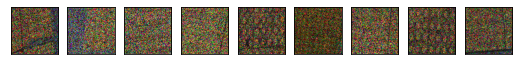

In [11]:
# 랜덤 삭제된 데이터 확인
n = 10
plt.figure(figsize=(10, 2))
for i in range(1,n):
    ax = plt.subplot(1, n, i)
    plt.imshow(noisy_train_data[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Model 만들기

In [13]:
model = Sequential()

model.add(Input(shape=(128, 128, 3)))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2), padding="same"))
model.add(Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2), padding="same"))
model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2), padding="same"))

model.add(Dense(2))

model.add(Conv2DTranspose(128, (3, 3), strides=2, activation="relu", padding="same"))
model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(Conv2DTranspose(64, (3, 3), strides=2, activation="relu", padding="same"))
model.add(Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(3, (1, 1), activation="sigmoid", padding="same"))

model.compile(optimizer='adam', loss='mse', metrics='accuracy')

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                    

### learning model

In [15]:
# zoomin, auto encoder : use model.fit(train_data, train_data, ....)
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    verbose=1,
    patience=50)
hist = model.fit(noisy_train_data, zoomin_train, epochs=100, batch_size=16, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/100
495/495 [==============================] - 21s 38ms/step - loss: 0.0123 - accuracy: 0.9280 - val_loss: 0.0078 - val_accuracy: 0.9455
Epoch 2/100
495/495 [==============================] - 18s 36ms/step - loss: 0.0072 - accuracy: 0.9278 - val_loss: 0.0057 - val_accuracy: 0.8997
Epoch 3/100
495/495 [==============================] - 18s 36ms/step - loss: 0.0056 - accuracy: 0.9120 - val_loss: 0.0054 - val_accuracy: 0.9087
Epoch 4/100
495/495 [==============================] - 18s 36ms/step - loss: 0.0054 - accuracy: 0.9166 - val_loss: 0.0052 - val_accuracy: 0.9171
Epoch 5/100
495/495 [==============================] - 18s 36ms/step - loss: 0.0051 - accuracy: 0.9194 - val_loss: 0.0050 - val_accuracy: 0.9078
Epoch 6/100
495/495 [==============================] - 18s 36ms/step - loss: 0.0051 - accuracy: 0.9237 - val_loss: 0.0049 - val_accuracy: 0.9053
Epoch 7/100
495/495 [==============================] - 18s 36ms/step - loss: 0.0050 - accuracy: 0.9244 - val_loss: 0.0049 - val_ac

In [16]:
model.save("inpainting_ae_0811_loss0.0039_e100.h5")

## load model

In [12]:
# load model
model = tf.keras.models.load_model("inpainting_ae_0811_loss0.0039_e100.h5")

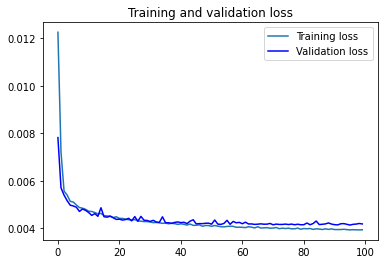

In [17]:
# plot loss history
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(len(loss))

plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## 데이터 분석 

In [13]:
decoded_imgs = model.predict(noisy_test_data)

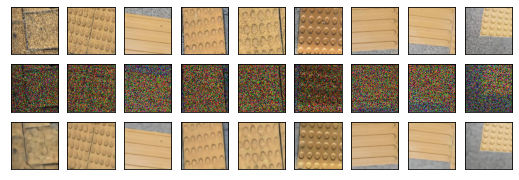

In [14]:
n = 10
plt.figure(figsize=(10, 3))
for i in range(1,n):
    # 원본 표시
    ax = plt.subplot(3, n, i)
    plt.imshow(test_data[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 랜덤 제거된 것
    ax = plt.subplot(3, n, i + n)
    plt.imshow(noisy_test_data[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 복구된 것
    ax = plt.subplot(3, n, i + 2*n)
    plt.imshow(decoded_imgs[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

In [15]:
decoded_train = model.predict(noisy_train_data)

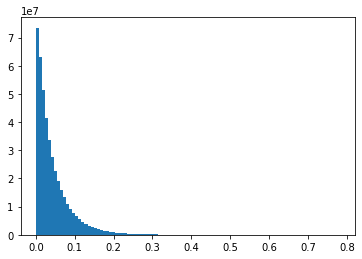

In [16]:
diff = np.abs(decoded_train - zoomin_train)
plt.hist(diff.flatten(), bins=100)
plt.show()

## diff 합계로 threshold 구하기

In [17]:
errors_sum = []

for (image, recon) in zip(zoomin_train, decoded_train):
	# 두 이미지 데이터의 diff를 합산
  tmp = np.abs(image - recon)
  tmp_2d = np.sum(tmp, axis = 2)
  tmp_1d = np.sum(tmp_2d, axis = 1)
  tmp_sum = np.sum(tmp_1d)
  errors_sum.append(tmp_sum)

errors_sum = np.array(errors_sum)
print(errors_sum.shape)

(8796,)


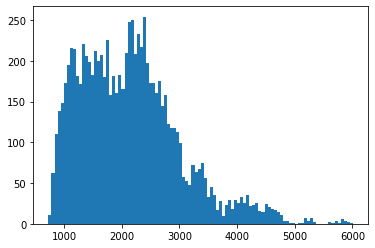

In [19]:
plt.hist(errors_sum, bins=100)
plt.show()

In [20]:
threshold = np.quantile(errors_sum, 0.995)
print(threshold)

4888.901501464828


## destroyed만 복원해서 결과 비교하기

In [21]:
noisy_destroyed_data = test_destroyed_data*np.random.randint(2, size=test_destroyed_data.shape)
decoded_destroy = model.predict(noisy_destroyed_data)

In [22]:
errors_sum_r_destroyed = []

for (image, recon) in zip(test_destroyed_data, decoded_destroy):
  # 두 이미지 데이터의 diff를 합산
  tmp = image - recon
  tmp = np.abs(tmp)
  tmp_2d = np.sum(tmp, axis = 2)
  tmp_1d = np.sum(tmp_2d, axis = 1)
  tmp_sum = np.sum(tmp_1d)
  print(tmp_sum)
  errors_sum_r_destroyed.append(tmp_sum)

4251.843
4897.493
6292.46
3853.8867
5621.7695
3142.4976
2181.7673
5316.3105
2055.6475
2639.1694
3687.8162
4662.9023
1914.3582
1398.4382
3934.6309
2941.1917
5176.198
4857.9062
2153.4355
3374.1277
3965.5522
5229.5527
7685.5356
3749.2322
3757.1523
3046.6807
4813.5225
6137.5903
3765.6885


In [23]:
errors_sum_r_destroyed = np.array(errors_sum_r_destroyed)
print(errors_sum_r_destroyed.shape)

(29,)


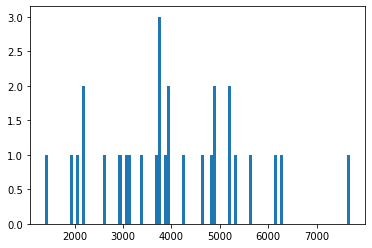

In [24]:
plt.hist(errors_sum_r_destroyed, bins=100)
plt.show()

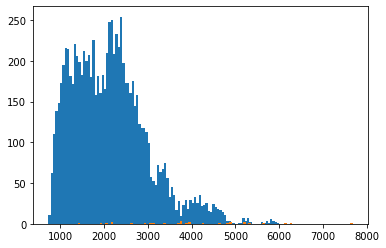

In [25]:
# train_x와 r_destroyed의 error값 분포
plt.hist(errors_sum, bins=100)
plt.hist(errors_sum_r_destroyed, bins=100)
plt.show()

In [26]:
# 이상치 탐지
anomaly_idxs = np.where(np.array(errors_sum_r_destroyed) >= threshold)[0]
print(len(anomaly_idxs))

8


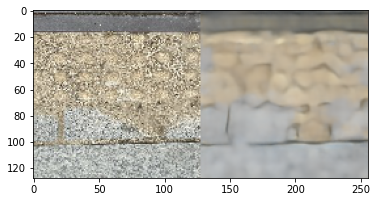

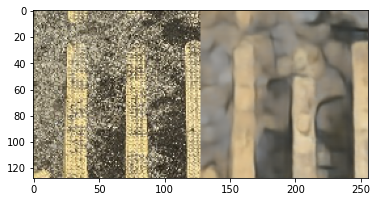

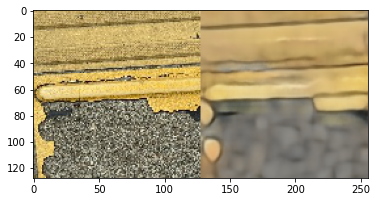

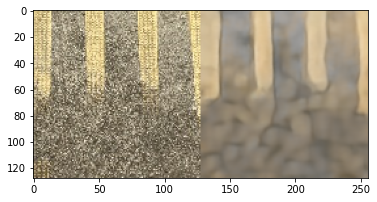

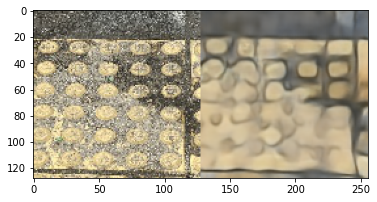

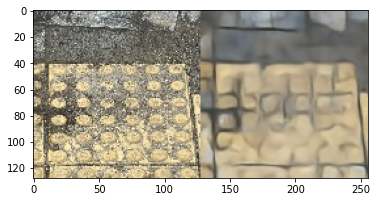

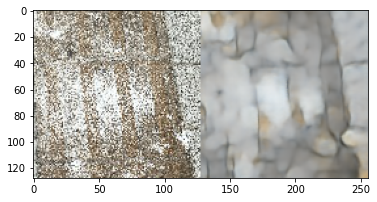

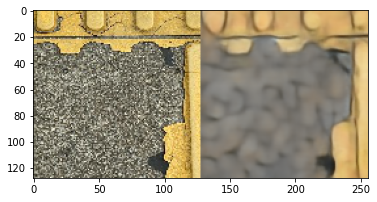

In [27]:
# 탐지된 이미지 확인
for i in anomaly_idxs:
  combined = np.hstack([test_destroyed_data[i], decoded_destroy[i]])
  plt.imshow(combined.squeeze())
  plt.show()

# test data error로 이상치 탐지

In [28]:
# 위에서 decoded_imgs로 이미 테스트 데이터 예측 해놓음.
errors_sum_test = []

for (image, recon) in zip(test_data, decoded_imgs):
  tmp = np.abs(image - recon)
  tmp_2d = np.sum(tmp, axis = 2)
  tmp_1d = np.sum(tmp_2d, axis = 1)
  tmp_sum = np.sum(tmp_1d)
  errors_sum_test.append(tmp_sum)

errors_sum_test = np.array(errors_sum_test)
print(errors_sum_test.shape)

(1007,)


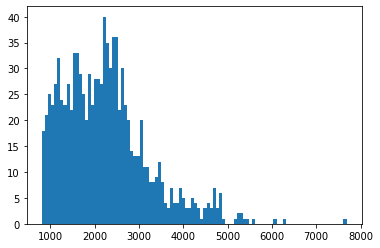

In [29]:
plt.hist(errors_sum_test, bins=100)
plt.show()

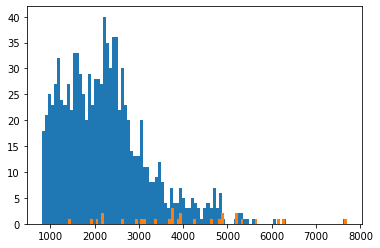

In [30]:
# test data와 destroyed 분포
plt.hist(errors_sum_test, bins=100)
plt.hist(errors_sum_r_destroyed, bins=100)
plt.show()

In [31]:
# 이상치 탐지
anomaly_idxs = np.where(np.array(errors_sum_test) >= threshold)[0]
print(len(anomaly_idxs))

12


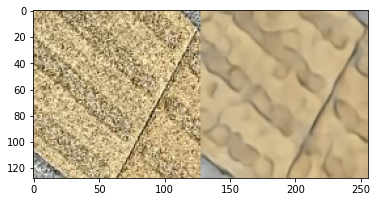

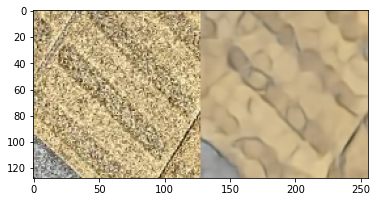

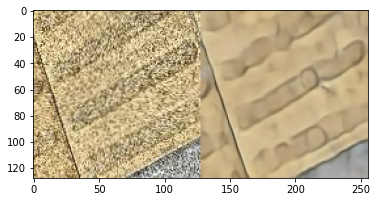

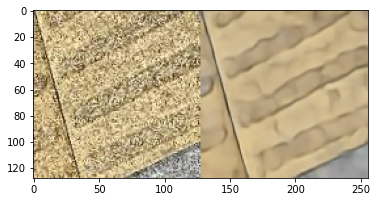

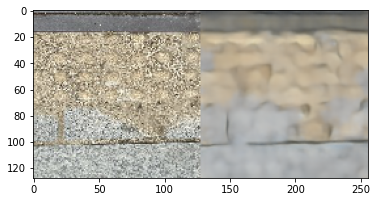

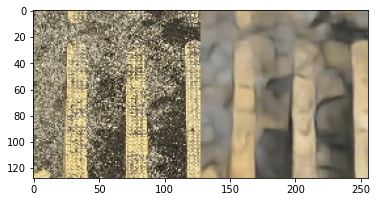

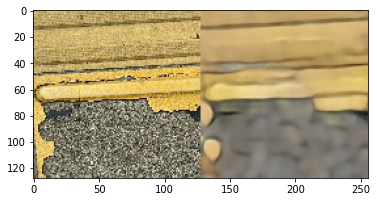

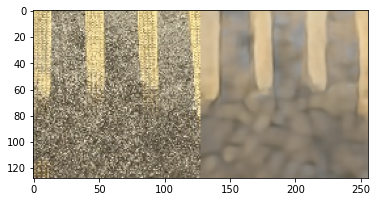

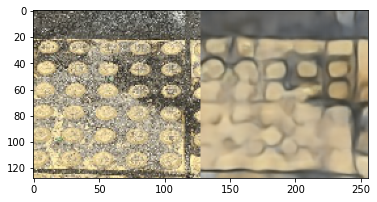

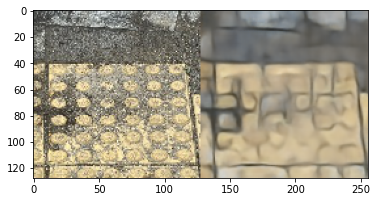

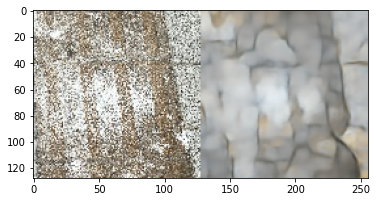

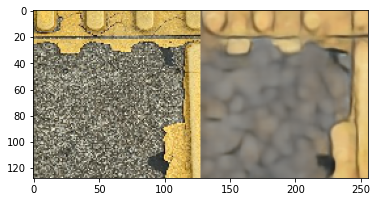

In [32]:
# 탐지된 이미지 확인
for i in anomaly_idxs:
  combined = np.hstack([test_data[i], decoded_imgs[i]])
  plt.imshow(combined.squeeze())
  plt.show()

## Recall Precision Curve

In [33]:
error_df = pd.DataFrame({'Reconstruction_error': errors_sum_test, 
                         'True_class':list(y_label)})

In [34]:
from sklearn import metrics
precision_rt, recall_rt, threshold_rt = metrics.precision_recall_curve(error_df['True_class'], error_df['Reconstruction_error'])

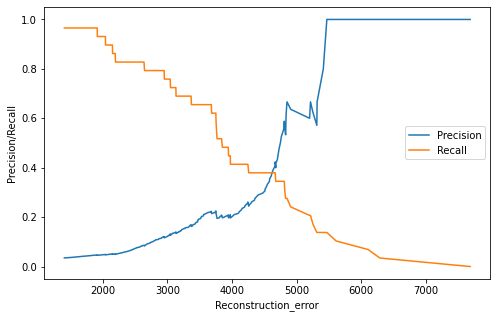

In [35]:
# recall precison curve 그리기
plt.figure(figsize=(8,5))
plt.plot(threshold_rt, precision_rt[1:], label='Precision')
plt.plot(threshold_rt, recall_rt[1:], label='Recall')
plt.xlabel('Reconstruction_error'); plt.ylabel('Precision/Recall')

plt.legend()
plt.show()

In [36]:
# 최적의 threshold 구하기
index_cnt = [cnt for cnt, (p, r) in enumerate(zip(precision_rt, recall_rt)) if p==r][0]
print('precision: ',precision_rt[index_cnt],', recall: ',recall_rt[index_cnt])

threshold_fixed = threshold_rt[index_cnt]
print('threshold: ',threshold_fixed)

precision:  0.3793103448275862 , recall:  0.3793103448275862
threshold:  4639.083


In [37]:
# threshold_fixed일때 test_data의 이상치 탐지
anomaly_idxs = np.where(np.array(errors_sum_test) >= threshold_fixed)[0]
print(len(anomaly_idxs))

29


In [38]:
# threshold_fixed일때 r_destroyed의 이상치 탐지
anomaly_idxs = np.where(np.array(errors_sum_r_destroyed) >= threshold_fixed)[0]
print(len(anomaly_idxs))

11


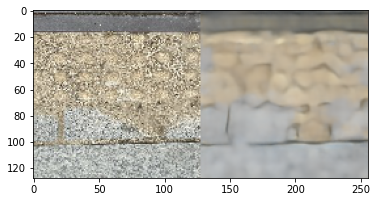

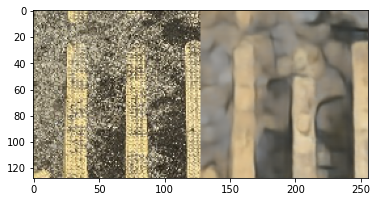

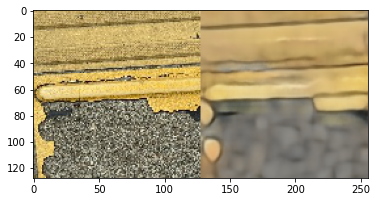

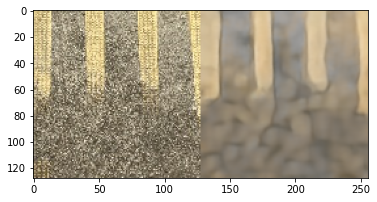

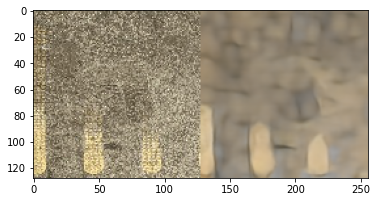

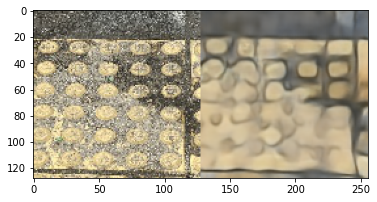

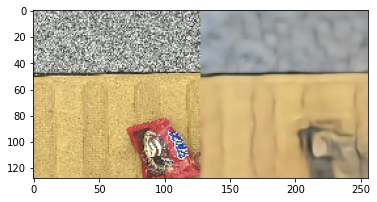

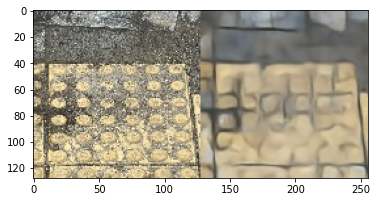

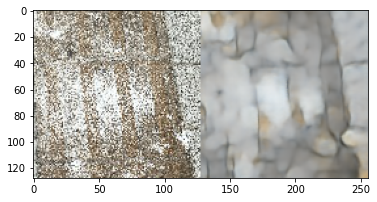

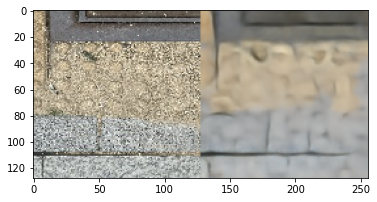

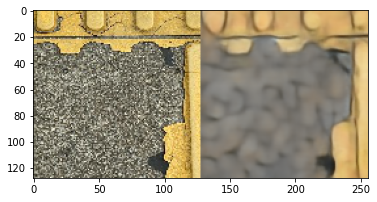

In [39]:
# r_destroyed의 이상치 이미지 출력
for i in anomaly_idxs:
  combined = np.hstack([test_destroyed_data[i], decoded_destroy[i]])
  plt.imshow(combined.squeeze())
  plt.show()

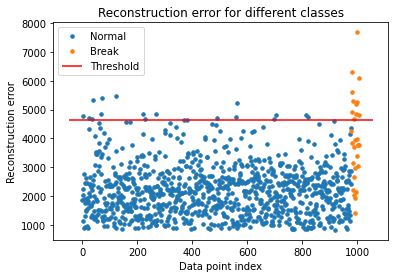

In [40]:
# reconstruction error 그래프 그리기
groups = error_df.groupby('True_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Break" if name == 1 else "Normal")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

## Confusion Matrix

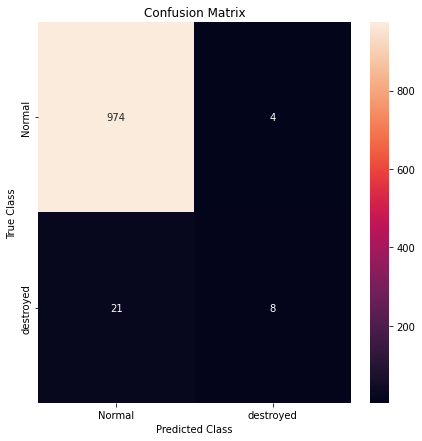

In [41]:
# threshold를 기준으로 했을때 confusion matrix
import seaborn as sns

LABELS = ['Normal', 'destroyed']

pred_y = [1 if e > threshold else 0 for e in error_df['Reconstruction_error'].values]

conf_matrix = metrics.confusion_matrix(error_df['True_class'], pred_y)
plt.figure(figsize=(7, 7))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class'); plt.ylabel('True Class')
plt.show()

## ROC curve & AUC

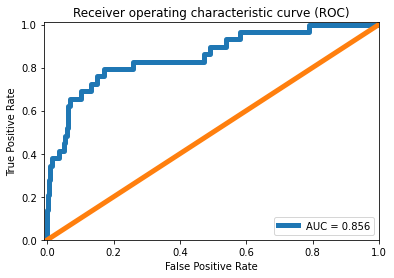

In [42]:
false_pos_rate, true_pos_rate, thresholds = metrics.roc_curve(error_df['True_class'], error_df['Reconstruction_error'])
roc_auc = metrics.auc(false_pos_rate, true_pos_rate,)

plt.plot(false_pos_rate, true_pos_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth=5)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC)')
plt.ylabel('True Positive Rate'); plt.xlabel('False Positive Rate')
plt.show()